In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df=pd.read_csv('SMSSpamCollection',sep='\t',names=['labels','text'])
df.head()

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['labels']=le.fit_transform(df['labels'])
df.head()
#spam 1 ham 0


,labels,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [98]:
df.tail()

,labels,text
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


In [45]:
df['labels'].value_counts()

labels
0    4825
1     747
Name: count, dtype: int64

In [36]:
!pip install nltk

  Using cached https://files.pythonhosted.org/packages/00/2e/d53fa4befbf2cfa713304affc7ca780ce4fc1fd8710527771b58311a3229/click-8.1.7-py3-none-any.whl


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [47]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [52]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [60]:
sent='Hi all hows the josh !'

In [54]:
from nltk.tokenize import word_tokenize
word_tokenize(set)

['Hi', 'all', 'hows', 'the', 'josh', '!']

In [58]:
from nltk.corpus import stopwords
stword=stopwords.words('english')
stword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [62]:
clean=[word for word in word_tokenize(sent) if word not in stword]
clean

['Hi', 'hows', 'josh', '!']

In [65]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
ps.stem(clean[1])

'how'

In [71]:
sent='Hello guys whats goint on lets ,start learning ML !'
clean=[ps.stem(word) for word in word_tokenize(sent) if word not in stword]
clean=[word for word in clean if word.isdigit() or word.isalpha()]
clean

['hello', 'guy', 'what', 'goint', 'let', 'start', 'learn', 'ml']

In [73]:
def clean_text(sent):
    clean=[ps.stem(word) for word in word_tokenize(sent) if word not in stword]
    clean=[word for word in clean if word.isdigit() or word.isalpha()]
    return clean

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer(analyzer=clean_text,max_features=3000)
x=tfid.fit_transform(df['text']).toarray()
y=df['labels']
print(x)
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: labels, Length: 5572, dtype: int32


In [75]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [76]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)


Text(0.5, 1.0, 'Gaussian Naive Bayes ')

<Figure size 1000x600 with 0 Axes>

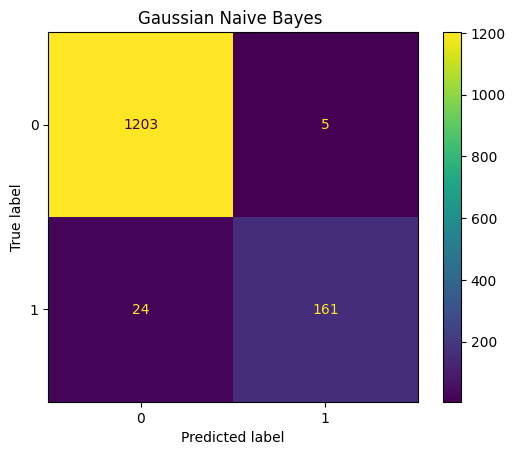

In [105]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(figsize=(10,6))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title("Gaussian Naive Bayes ")

In [78]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8693467336683417


In [79]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9791816223977028


In [104]:
tinp=input("Enter the text you want :- ")
inp=[tinp]
x_inp1=tfid.transform(inp).toarray()
print(gb.predict(x_inp1))

Enter the text you want :-  Free entry in 2 a wkly comp to win FA Cup fina..


[1]
